# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

requests.get(btc_url).json()

{'data': {'1': {'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'website_slug': 'bitcoin',
   'rank': 1,
   'circulating_supply': 18528750,
   'total_supply': 18528750,
   'max_supply': 21000000,
   'quotes': {'USD': {'price': 13304.47,
     'volume_24h': 26880019061,
     'market_cap': 246515217194,
     'percentage_change_1h': 0.32000157695137,
     'percentage_change_24h': -2.4606933816136,
     'percentage_change_7d': 11.7205155823269,
     'percent_change_1h': 0.32000157695137,
     'percent_change_24h': -2.4606933816136,
     'percent_change_7d': 11.7205155823269},
    'CAD': {'price': 17710.910464,
     'volume_24h': 35782681374.0032,
     'market_cap': 328161057128.653,
     'percent_change_1h': 0.32000157695137,
     'percent_change_24h': -2.4606933816136,
     'percent_change_7d': 11.7205155823269}},
   'last_updated': 1603928366}},
 'metadata': {'timestamp': 1603928366,
  'num_cryptocurrencies': 1430,
  'error': None}}

In [5]:
# Fetch current BTC price
response_data = requests.get(btc_url).json()
price_btc = response_data['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
response_data = requests.get(eth_url).json()
price_eth = response_data['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = my_btc * price_btc
my_eth_value = my_eth * price_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $15965.36
The current value of your 5.3 ETH is $2060.80


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares
my_spy = 50
my_agg = 200

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")


In [8]:
# Format current date as ISO format
current_date = pd.Timestamp("2020-10-20", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
data = alpaca.get_barset(
    tickers,
    timeframe,
    start = current_date,
    end = current_date
).df

# Preview DataFrame
data

AGG                                      SPY  \
                            open    high     low   close   volume    open   
2020-10-20 00:00:00-04:00  117.7  117.71  117.58  117.64  3624855  343.46   

                                                             
                             high     low   close    volume  
2020-10-20 00:00:00-04:00  346.88  342.64  343.34  48206853

In [9]:
# Pick AGG and SPY close prices
agg_close_price = data["AGG"]["close"][0]
spy_close_price = data["SPY"]["close"][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.64
Current SPY closing price: $343.34


In [10]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $17167.00
The current value of your 200 AGG shares is $23528.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
df_savings = pd.DataFrame(
    [
        [my_btc_value + my_eth_value],
        [my_spy_value + my_agg_value]
    ],
    index = ["Crypto Value", "Stock Value"],
    columns = ["amount"]
)
# Display savings DataFrame
display(df_savings)

,amount
Crypto Value,18026.163
Stock Value,40695.000


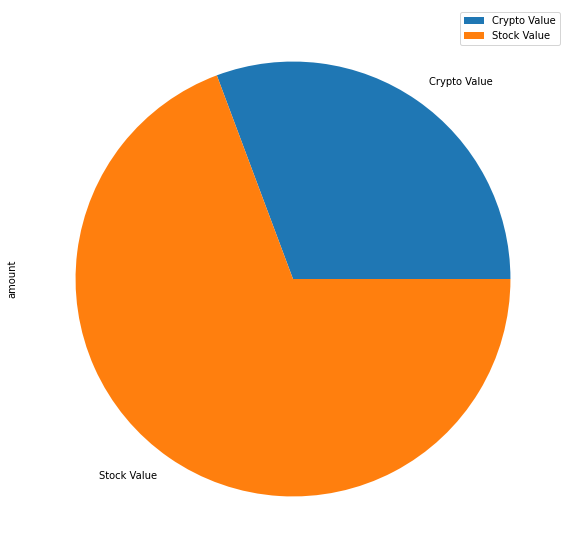

In [12]:
# Plot savings pie chart
df_savings.plot(kind = "pie", y = "amount", figsize = (10,10))

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings["amount"]["Crypto Value"] + df_savings["amount"]["Stock Value"]

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in this fund.")
elif total_savings == emergency_fund:
    print("Congratulations! You have reached your financial goal.")
else:
    print(f"You are ${(emergency_fund-total_savings):0.2f} away from reaching your financial goal.")

Congratulations! You have enough money in this fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

#Preview data
data

# Display sample data
df_stock_data.head()

AGG                                        \
                             open      high      low   close     volume   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167.0   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778.0   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907.0   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979.0   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173.0   

                              SPY                                     
                             open    high     low   close     volume  
2015-08-07 00:00:00-04:00  208.16  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  209.28  210.67  209.28  210.58   66755890  
2015-08-11 00:00:00-04:00  208.98  209.47  207.76  208.63   88424557  
2015-08-12 00:00:00-04:00  207.11  209.14  205.36  208.89  136171450  
2015-08-13 00:00:00-04:00  208.73  209.55  208.01  208.63   77197796

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
mc = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = 100,
    num_trading_days = 30*252)


In [17]:
# Printing the simulation input data
df_stock_data.head()

AGG                                        \
                             open      high      low   close     volume   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167.0   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778.0   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907.0   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979.0   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173.0   

                              SPY                                     
                             open    high     low   close     volume  
2015-08-07 00:00:00-04:00  208.16  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  209.28  210.67  209.28  210.58   66755890  
2015-08-11 00:00:00-04:00  208.98  209.47  207.76  208.63   88424557  
2015-08-12 00:00:00-04:00  207.11  209.14  205.36  208.89  136171450  
2015-08-13 00:00:00-04:00  208.73  209.55  208.01  208.63   77197796

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
mc.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000995,1.007411,1.011877,1.003678,1.009192,0.994072,0.998361,1.004371,1.004497,1.004142,...,1.012674,0.989184,0.999237,0.999441,0.996269,0.990269,1.002262,0.998900,1.007661,1.007000
2,1.006268,1.007203,1.019672,0.993078,1.010178,0.999283,0.999870,1.003620,1.010855,0.992993,...,1.007086,0.990073,0.994104,1.000629,0.984774,0.994053,0.998443,1.004858,1.008424,1.011015
3,1.001971,0.995461,1.016269,0.991923,1.016080,1.015464,1.002964,0.998567,1.016220,0.988249,...,1.012160,0.984954,1.000019,0.994769,0.987198,0.992579,0.998217,1.003658,1.005278,1.015047
4,0.998065,1.000248,1.024756,0.986303,1.015822,1.012092,1.005602,0.996563,1.022643,0.991300,...,1.002047,0.993656,1.012210,0.986222,0.983368,0.998862,1.003356,1.003958,0.997840,1.009393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,8.748293,12.698417,7.631336,6.685200,7.744213,4.044811,6.662275,3.539468,10.415886,5.803773,...,2.327600,9.392266,5.154134,9.653358,8.269302,4.971120,4.649078,6.751072,5.837535,5.166488
7557,8.744141,12.748808,7.680588,6.683137,7.729125,4.028523,6.595921,3.549056,10.432240,5.814933,...,2.354237,9.492100,5.155337,9.585771,8.323750,4.964772,4.659818,6.808685,5.830050,5.205033
7558,8.719303,12.809504,7.666902,6.669310,7.678431,4.021795,6.560543,3.510465,10.546994,5.714411,...,2.335815,9.396604,5.178564,9.464654,8.271302,4.977431,4.688856,6.817839,5.831502,5.206458
7559,8.695480,12.851681,7.595260,6.666190,7.611558,4.037862,6.515968,3.513647,10.555588,5.740001,...,2.352264,9.547197,5.167213,9.381825,8.245025,4.972167,4.633538,6.862609,5.917306,5.171808


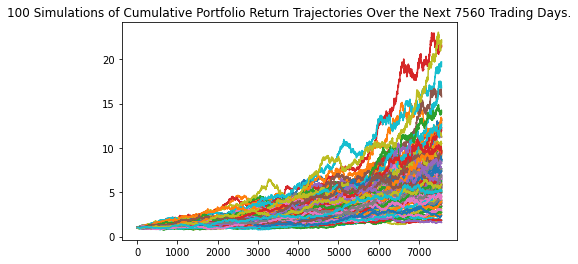

In [19]:
# Plot simulation outcomes
mc.plot_simulation()

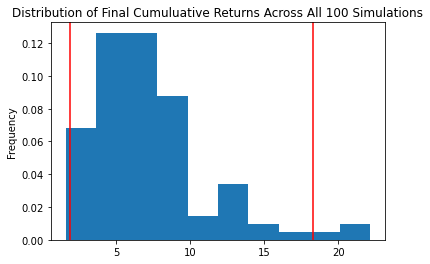

In [20]:
# Plot probability distribution and confidence intervals
mc.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats = mc.summarize_cumulative_return()

# Print summary statistics
print(summary_stats)

count           100.000000
mean              7.246459
std               4.045853
min               1.582598
25%               4.486561
50%               6.176399
75%               9.235034
max              22.153426
95% CI Lower      1.840962
95% CI Upper     18.305305
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
lower_ci = round(summary_stats[8] * initial_investment, 2)
upper_ci = round(summary_stats[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${lower_ci} and ${upper_ci}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $36819.24 and $366106.1


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment_2 = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
lower_ci_2 = round(summary_stats[8] * initial_investment_2, 2)
upper_ci_2 = round(summary_stats[9] * initial_investment_2, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_2} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${lower_ci_2} and ${upper_ci_2}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $55228.86 and $549159.15
